In [1]:
%pylab inline
import pymongo
import nibabel as nib
from pbr.config import config as cc
from os.path import join

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_collection(port=3001):
    from pymongo import MongoClient
    client = MongoClient("localhost", port)
    db =  client.meteor
    collection = db.subjects
    return collection, client

In [3]:
def bama(t):
    if type(t) is list:
        print(len(t))
    else:
        print(t.keys())

In [4]:
def get_papaya_aff(img):
    vs = img.header.get_zooms()
    aff = img.get_affine()
    ort = nib.orientations.io_orientation(aff)
    papaya_aff = np.zeros((4, 4))
    for i, line in enumerate(ort):
        papaya_aff[line[0],i] = vs[i]*line[1]
    papaya_aff[:, 3] = aff[:, 3]
    return papaya_aff

In [19]:
from dipy.tracking import utils
from dipy.tracking.utils import subsegment

def convert_to_volume(drawing, papaya_aff, aff, img):

    topoints = lambda x : np.array([[m["x"], m["y"], m["z"]] for m in x["world_coor"]])
    points_orig = list(map(topoints, drawing))
    points = list(subsegment(points_orig, 0.5))
    #print(points)
    mask2 = utils.density_map(points, img.shape, affine=papaya_aff)
    points_nifti_space = list(utils.move_streamlines(points, aff, input_space=papaya_aff))
    mask1 = utils.density_map(points_nifti_space, img.shape, affine=aff)

    
    
    print((mask1 == mask2).all())
    # img1 = nib.Nifti1Image(mask1)
    print(mask1.sum(), mask2.sum())
    
    return mask1, points_nifti_space



In [20]:
coll, cli = get_collection(4041)

In [21]:
msid = "mse4685"
output = coll.find_one({"subject_id":msid, "entry_type":"mindboggle"})

In [22]:
img = nib.load(join(cc["output_directory"],output["check_masks"][0]))
aff = img.get_affine() #affine()
papaya_affine = get_papaya_aff(img)
data = np.zeros(img.shape)
for contour in output["contours"]:
    drawing = contour["contours"]
    name = contour['name'].replace(" ", "_")
    author = contour["checkedBy"]

    mask, points_nifti_space = convert_to_volume(drawing, papaya_affine, aff, img)
    outfilename = join(msid, "{}-{}.nii.gz".format(name,author))
    nib.Nifti1Image(mask.astype(np.float32), affine=aff).to_filename(join(cc["output_directory"], outfilename))
    
    print("wrote", outfilename)

/data/henry1/keshavan/anaconda/envs/ak3/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


True
33 33
wrote mse4685/DURA-anisha.nii.gz


In [54]:
from dipy.tracking.utils import subsegment

In [55]:
subsegment?

In [40]:
new_output = output["check_masks"]
if not outfilename in new_output:
    new_output.append(outfilename)

In [42]:
coll.update_one({"subject_id":msid, "entry_type":"mindboggle"},{"$set": {"check_masks": new_output}})

# REALLY IMPORTANT FOR LOOP

use this affine & save w/ img.get_affine

In [82]:
join(cc["output_directory"], outfilename)

'/data/henry7/PBR/subjects/mse4685/dura.nii.gz'

In [194]:
mask2 = utils.density_map(points, img.shape, affine=papaya_aff)

points_nifiti_space = list(utils.move_streamlines(points, aff, input_space=papaya_aff))
mask1 = utils.density_map(points_nifiti_space, img.shape, affine=aff)

# print(points)

print((mask1 == mask2).all())
# img1 = nib.Nifti1Image(mask1)
print(mask1.sum(), mask2.sum())
# print(mask1.shape, mask2.shape)

False
47 0


In [197]:
utils._mapping_to_voxel??

In [195]:
utils.density_map??

In [48]:
hdr = img.get_header()

In [112]:
nib.__version__

'2.0.2'

In [49]:
print(hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 176 240 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.          1.          1.          1.          2.29999995  0.          0.
  0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.004363315645605326
quatern_c       : -0.9999904632568359
quatern_d       : 1.7435246135732996e-0

In [37]:
print(hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'?TR:2300.000 TE:2.'
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 256 176   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [ -1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   2.29999995e+00   1.00000000e+00   1.00000000e+00   6.12224727e+04]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.5021768808364868
quatern_c       :

In [42]:
np.isclose(hdr.get_sform(), hdr.get_qform())

array([[ True, False,  True,  True],
       [ True, False,  True,  True],
       [False,  True, False,  True],
       [ True,  True,  True,  True]], dtype=bool)

In [44]:
hdr.get_sform()- hdr.get_qform()

array([[ -3.46867068e-08,  -3.47180084e-08,  -1.03175730e-08,
          0.00000000e+00],
       [  1.03175730e-08,  -3.50223104e-08,  -3.46867056e-08,
          0.00000000e+00],
       [ -3.47180084e-08,   1.22124533e-15,   3.50223104e-08,
          0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00]])

In [223]:
data.shape

(240, 256, 176)

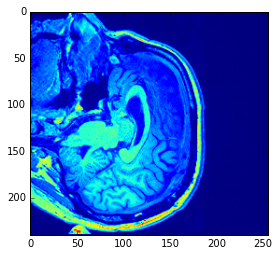

In [230]:
imshow(img.get_data()[:,:, 88])